# Module tests

In [1]:
import cv2
import numpy as np
import imregpoc
import imutils 
from imshowtools import imshow
import pywt
from Utility import arnoldTransform, arnoldInverseTransform, ncc

In [2]:
# for visualize
from matplotlib import pyplot as plt
%matplotlib inline

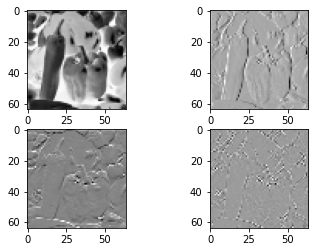

In [3]:
#Extract master share (No attack)
#Y_split = rerotate_img[:,:,0]
img = cv2.imread('imgs/peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y_split = img[:,:,0]
coeffs = pywt.wavedec2(np.array(Y_split), wavelet='haar',level=3)
LL, [LH3,HL3,HH3],[LH2,HL2,HH2],[LH1,HL1,HH1] = coeffs

plt.subplot(2,2,1)
plt.imshow(LL, cmap="Greys")
plt.subplot(2,2,2)
plt.imshow(HL3, cmap="Greys")
plt.subplot(2,2,3)
plt.imshow(LH3, cmap="Greys")
plt.subplot(2,2,4)
plt.imshow(HH3, cmap="Greys")

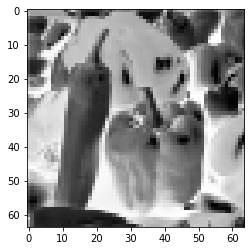

In [4]:
LL.shape
#print(np.array(LL)/np.mean(LL[:, :]))
plt.imshow(LL, cmap='Greys') 
plt.show()

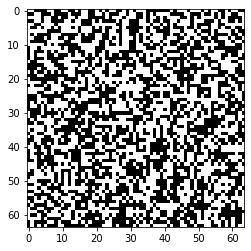

In [5]:
dct_img = cv2.dct(LL, cv2.DCT_ROWS)
img1 = np.uint8(dct_img)

# master share
ms_img = img1
#plt.imshow(img1, cmap='Greys') 
#plt.show()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if (img1[i][j] >= 128):
            ms_img[i][j] = 255
        else: 
            ms_img[i][j] = 0
            

plt.imshow(ms_img, cmap='Greys') 
plt.show()

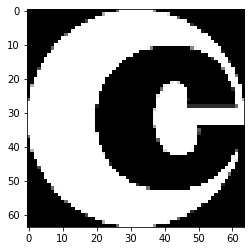

In [6]:
# arnoldTransform process
a = 6
b = 40
key = 33
os_img = cv2.imread("./os_img/os_peppers.png", 0)
wm_ar_xor = img1 
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
            wm_ar_xor[i][j] = ms_img[i][j] ^ os_img[i][j]
            
wm_ar_inv1 = arnoldInverseTransform(wm_ar_xor, key)
wm_ar_inv1.shape
plt.imshow(wm_ar_inv1, cmap='Greys') 
plt.show()

In [7]:
# Calculate NCC 
wm_img = cv2.imread("./wms/wm.png", 0)
ncc(wm_ar_inv1, wm_img)

0.9999999999999998